In [1]:
!pip install gdown

!gdown --id 1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY

!unzip Teeth\ DataSet.zip -d dataset

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY
From (redirected): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY&confirm=t&uuid=f3bdd468-49e5-4e8b-b073-64c7a469395c
To: /kaggle/working/Teeth DataSet.zip
100%|██████████████████████████████████████| 49.1M/49.1M [00:00<00:00, 73.7MB/s]
Archive:  Teeth DataSet.zip
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1239_0_6735.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1219_0_8165.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1245_0_3892.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1223_0_2790.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1230_0_9636.jpg  
  inflating: dataset/Teeth_Dataset/Testing/OC/oc_1226_0_6144.jpg

In [2]:
import os, shutil
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
base = "/kaggle/working/dataset/Teeth_Dataset"

for folder in os.listdir(base):
    print(folder, "->", os.listdir(f"{base}/{folder}"))

Validation -> ['OLP', 'CoS', 'Gum', 'OT', 'OC', 'MC', 'CaS']
Training -> ['OLP', 'CoS', 'Gum', 'OT', 'OC', 'MC', 'CaS']
Testing -> ['output_image.jpg', 'OLP', 'CoS', 'Gum', 'OT', 'outputs', 'out', 'output', 'OC', 'MC', 'CaS']


In [4]:
DATASET_PATH  = Path("/kaggle/working/dataset/Teeth_Dataset")
train = DATASET_PATH / "Training"
test = DATASET_PATH / "Testing"
out = DATASET_PATH / "Outside"
val = DATASET_PATH / "Validation"

os.makedirs(out, exist_ok=True)

labels = os.listdir(train)

for x in os.listdir(test):
    if x not in labels:
        shutil.move(f"{test}/{x}", f"{out}/{x}")

print("Testing cleaned")

Testing cleaned


In [5]:
rows = []

for split, root_dir in [("train", train), ("val", val),("test",test)]:
    for cls_dir in sorted(root_dir.iterdir()):
        if cls_dir.is_dir():
            for ext in ["*.jpg", "*.JPG"]:
                for img_path in cls_dir.glob(ext):
                    rows.append({
                        "split": split,
                        "label": cls_dir.name,
                        "path": str(img_path)
                    })

df = pd.DataFrame(rows)

print("Total images:", len(df))
print("Total classes:", df['label'].nunique())
print("Train/Val distribution:")
print(df['split'].value_counts())
print("*"*100)
print(df.head())

Total images: 5143
Total classes: 7
Train/Val distribution:
split
train    3087
val      1028
test     1028
Name: count, dtype: int64
****************************************************************************************************
   split label                                               path
0  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...
1  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...
2  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...
3  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...
4  train   CaS  /kaggle/working/dataset/Teeth_Dataset/Training...


In [6]:
df_train = df[df['split'] == "train"]

print("Number of classes:", df_train['label'].nunique())
print("Train images per class:")
print(df_train['label'].value_counts())
print("*"*50)

df_val = df[df['split'] == "val"]

print("Number of classes:", df_val['label'].nunique())
print("Train images per class:")
print(df_val['label'].value_counts())
print("*"*50)

df_test = df[df['split'] == "test"]

print("Number of classes:", df_test['label'].nunique())
print("Train images per class:")
print(df_test['label'].value_counts())

Number of classes: 7
Train images per class:
label
MC     540
OLP    540
CaS    480
CoS    450
OT     393
Gum    360
OC     324
Name: count, dtype: int64
**************************************************
Number of classes: 7
Train images per class:
label
MC     180
OLP    180
CaS    160
CoS    149
OT     131
Gum    120
OC     108
Name: count, dtype: int64
**************************************************
Number of classes: 7
Train images per class:
label
MC     180
OLP    180
CaS    160
CoS    149
OT     131
Gum    120
OC     108
Name: count, dtype: int64


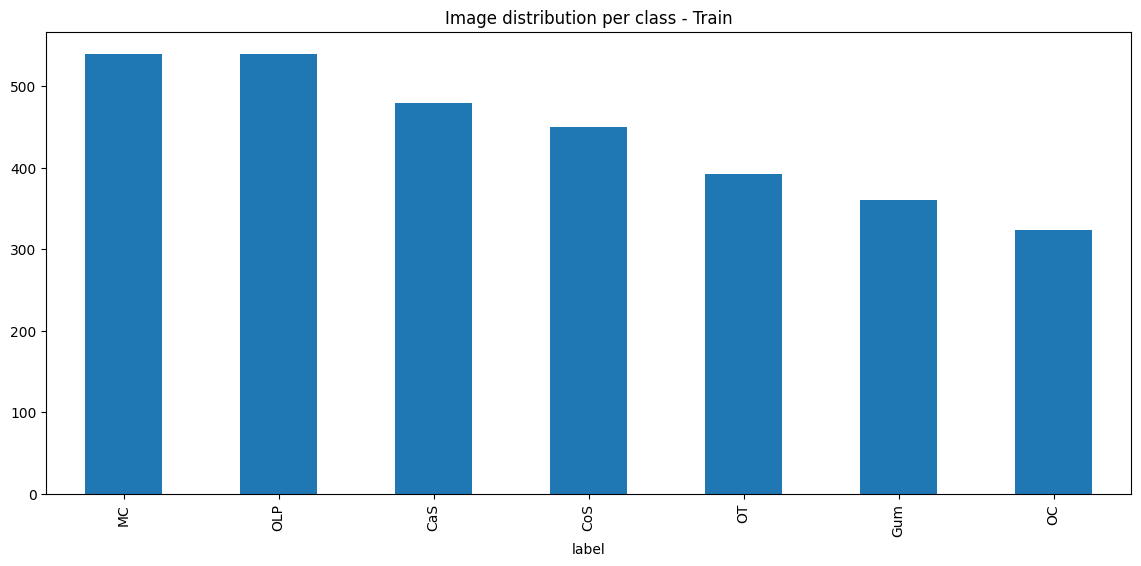

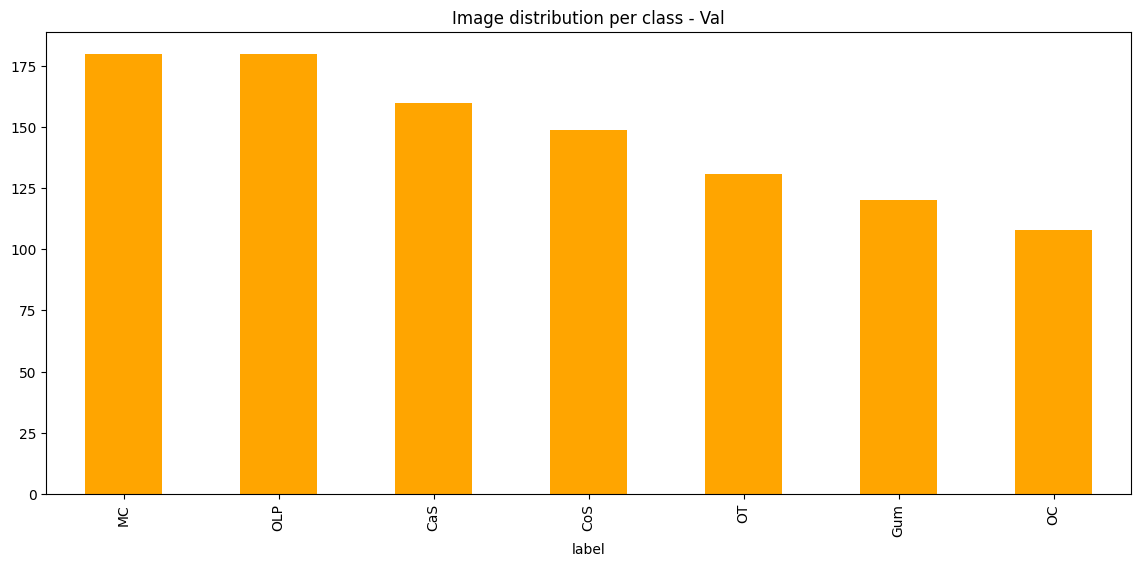

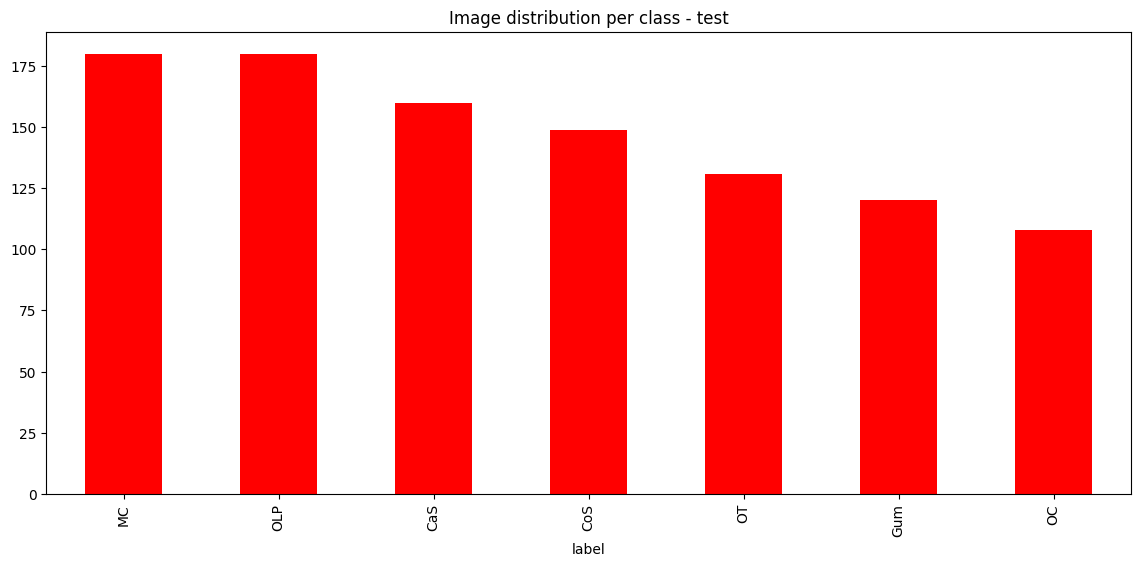

In [7]:
train_counts = df[df['split']=="train"]['label'].value_counts()
plt.figure(figsize=(14,6))
train_counts.plot(kind='bar')
plt.title("Image distribution per class - Train")
plt.xticks(rotation=90)
plt.show()

val_counts = df[df['split']=="val"]['label'].value_counts()
plt.figure(figsize=(14,6))
val_counts.plot(kind='bar', color="orange")
plt.title("Image distribution per class - Val")
plt.xticks(rotation=90)
plt.show()

val_counts = df[df['split']=="test"]['label'].value_counts()
plt.figure(figsize=(14,6))
val_counts.plot(kind='bar', color="red")
plt.title("Image distribution per class - test")
plt.xticks(rotation=90)
plt.show()

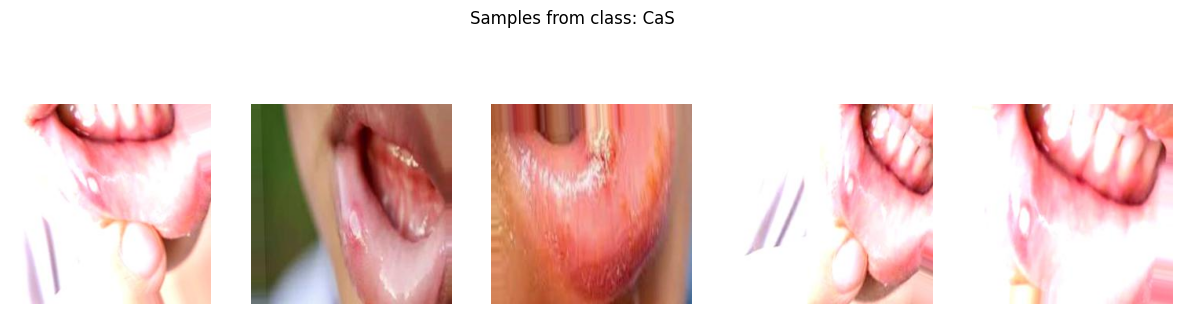

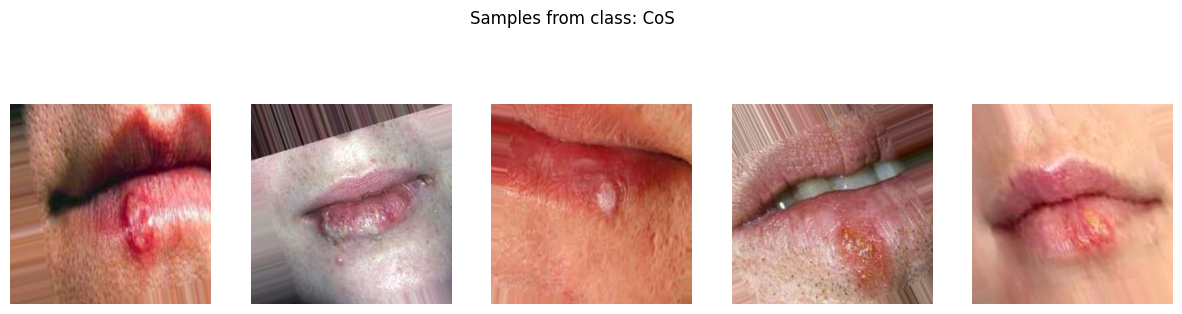

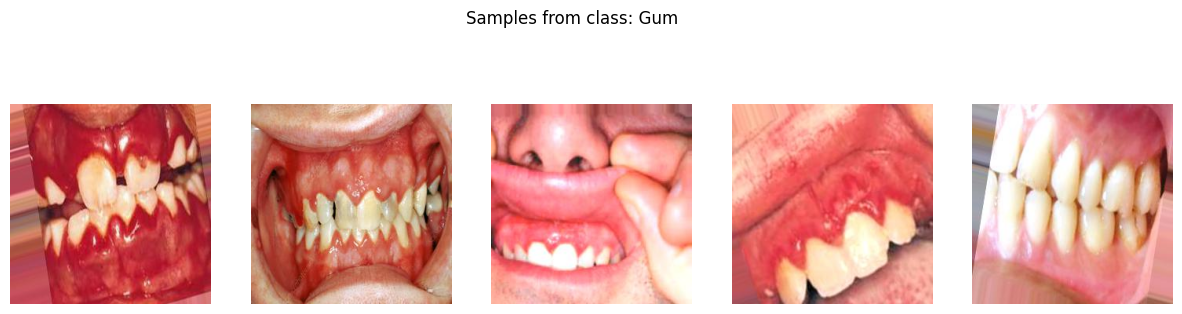

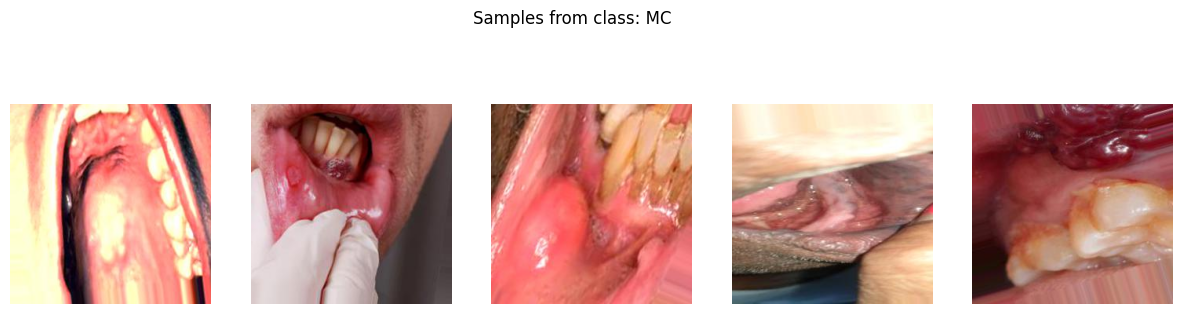

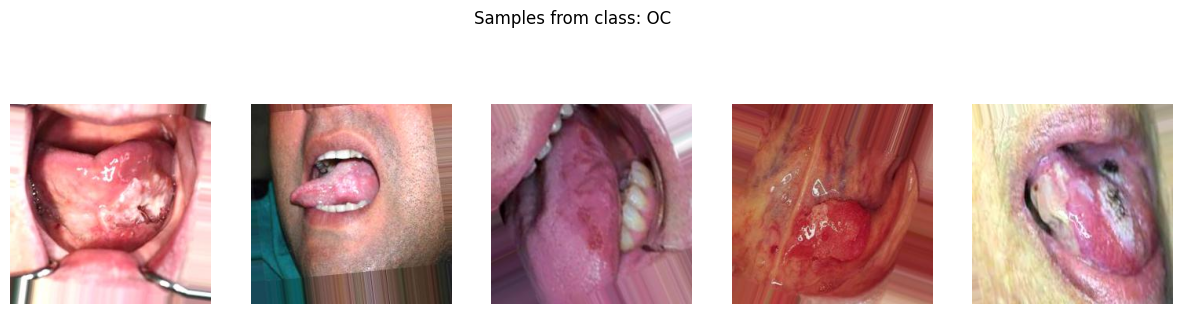

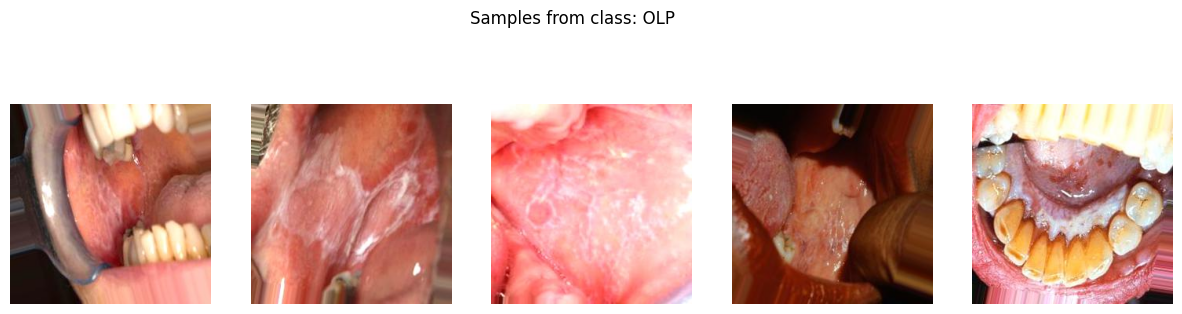

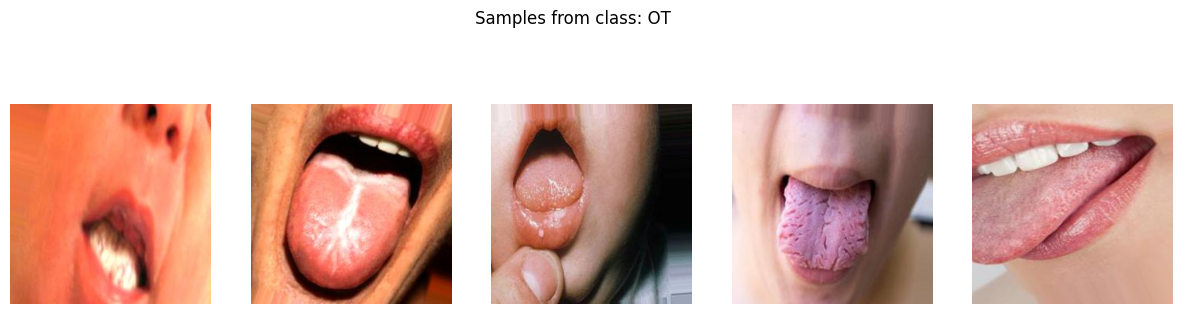

In [8]:
import random

def show_samples(label, n=5):
    subset = df[(df['label'] == label) & (df['split'] == "train")]['path'].tolist()
    sample = random.sample(subset, min(n, len(subset)))
    
    plt.figure(figsize=(15, 4))
    for i, p in enumerate(sample, 1):
        img = Image.open(p).convert("RGB")
        plt.subplot(1, len(sample), i)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Samples from class: {label}")
    plt.show()
    
for lbl in df['label'].unique()[:]: 
    show_samples(lbl, n=5)

In [9]:
from tqdm import tqdm
size_counts = {}

for img_path in tqdm(df['path'], desc="Reading image sizes"):
    with Image.open(img_path) as img:
        size = img.size 
        size_counts[size] = size_counts.get(size, 0) + 1

print("Unique sizes:", len(size_counts))
for size, count in size_counts.items():
    print(size, ":", count)

Reading image sizes: 100%|██████████| 5143/5143 [00:00<00:00, 15685.50it/s]

Unique sizes: 1
(256, 256) : 5143


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augment_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)


2026-02-07 11:34:36.391554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770464076.763700      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770464076.873622      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770464077.770896      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770464077.770939      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770464077.770942      55 computation_placer.cc:177] computation placer alr

In [11]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/kaggle/working/dataset/Teeth_Dataset/Training/CaS/a_100_0_1462.jpg"

img = image.load_img(img_path, target_size=(256,256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  


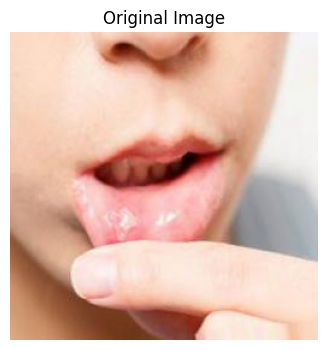

In [12]:
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

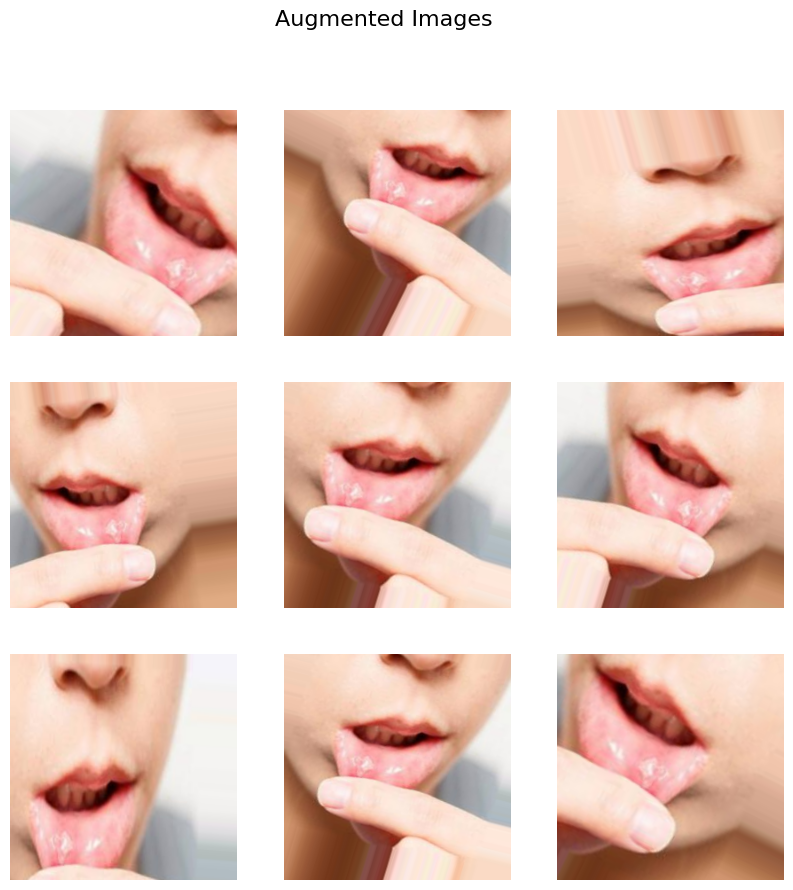

In [13]:
augmented_images = augment_datagen.flow(
    img_array,
    batch_size=1
)

plt.figure(figsize=(10,10))

for i in range(9):
    augmented_img = next(augmented_images)[0]
    plt.subplot(3,3,i+1)
    plt.imshow(augmented_img)
    plt.axis("off")

plt.suptitle("Augmented Images", fontsize=16)
plt.show()


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

INPUT_DIR  = "/kaggle/working/dataset/Teeth_Dataset/Training"
OUTPUT_DIR = "/kaggle/working/dataset/Augmented_Trainings"

augment_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

NUM_IMAGES_PER_CLASS = 800

for class_name in os.listdir(INPUT_DIR):
    class_input = os.path.join(INPUT_DIR, class_name)
    class_output = os.path.join(OUTPUT_DIR, class_name)

    if not os.path.isdir(class_input):
        continue

    os.makedirs(class_output, exist_ok=True)

    generator = augment_datagen.flow_from_directory(
        INPUT_DIR,
        classes=[class_name],      
        target_size=(256,256),
        batch_size=1,
        class_mode=None,
        save_to_dir=class_output,  
        save_prefix='aug',
        save_format='jpg'
    )

    for i in range(NUM_IMAGES_PER_CLASS):
        next(generator)

print("Augmented images saved per class!")


Found 540 images belonging to 1 classes.
Found 450 images belonging to 1 classes.
Found 360 images belonging to 1 classes.
Found 393 images belonging to 1 classes.
Found 324 images belonging to 1 classes.
Found 540 images belonging to 1 classes.
Found 480 images belonging to 1 classes.
Augmented images saved per class!


In [15]:
rows = []

train = Path("/kaggle/working/dataset/Augmented_Trainings")

for split, root_dir in [("train", train)]:
    for cls_dir in sorted(root_dir.iterdir()):
        if cls_dir.is_dir():
            for ext in ["*.jpg", "*.JPG", "*.png"]:
                for img_path in cls_dir.glob(ext):
                    rows.append({
                        "split": split,
                        "label": cls_dir.name,
                        "path": str(img_path)
                    })

df = pd.DataFrame(rows)

print("Total images:", len(df))
print("Total classes:", df['label'].nunique())
print("Train/Val distribution:")
print(df['split'].value_counts())
print("*" * 100)
print(df.head())


Total images: 5600
Total classes: 7
Train/Val distribution:
split
train    5600
Name: count, dtype: int64
****************************************************************************************************
   split label                                               path
0  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...
1  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...
2  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...
3  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...
4  train   CaS  /kaggle/working/dataset/Augmented_Trainings/Ca...


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    OUTPUT_DIR,
    target_size=(256,256),   
    batch_size=32,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    val,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = train_datagen.flow_from_directory(
    test,
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False           
)


Found 5600 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [17]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    CNN = tf.keras.Sequential([
    
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(256,256,3)),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
    
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Dense(df_train['label'].nunique(), activation='softmax')
    ])


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


I0000 00:00:1770464170.993011      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1770464170.999263      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,635,143 (6.24 MB)

 Trainable params: 1,635,143 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

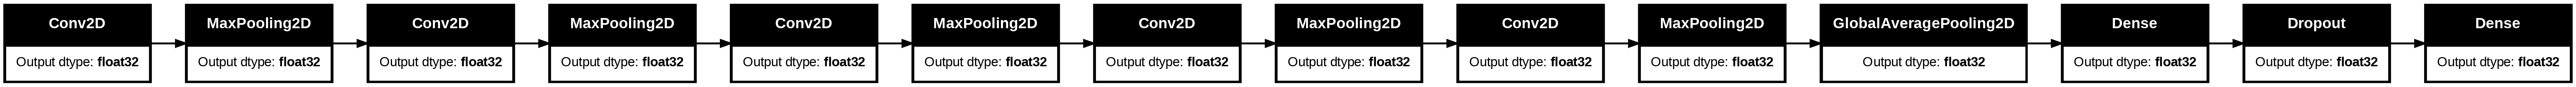

In [19]:
tf.keras.utils.plot_model(CNN, rankdir='LR',show_dtype=True)

In [20]:
with strategy.scope():
    CNN.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_accuracy',   
    patience=10,               
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

training_history = CNN.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=100,            
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

I0000 00:00:1770464176.407212     206 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1770464178.122359     205 cuda_dnn.cc:529] Loaded cuDNN version 91002


174/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1570 - loss: 1.9358INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.1573 - loss: 1.9356 - val_accuracy: 0.1673 - val_loss: 1.9043
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2428 - loss: 1.8654

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.2428 - loss: 1.8654 - val_accuracy: 0.2393 - val_loss: 1.7936
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2543 - loss: 1.8123

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.2544 - loss: 1.8121 - val_accuracy: 0.2422 - val_loss: 1.7458
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2879 - loss: 1.7315

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.2880 - loss: 1.7314 - val_accuracy: 0.2870 - val_loss: 1.7011
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3380 - loss: 1.6670

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.3380 - loss: 1.6670 - val_accuracy: 0.3482 - val_loss: 1.5968
Epoch 6/100
174/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3524 - loss: 1.6327

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.3524 - loss: 1.6326 - val_accuracy: 0.3804 - val_loss: 1.5885
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.3514 - loss: 1.6001 - val_accuracy: 0.3492 - val_loss: 1.5360
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3805 - loss: 1.5538

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.3805 - loss: 1.5537 - val_accuracy: 0.4202 - val_loss: 1.4495
Epoch 9/100
174/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4027 - loss: 1.4986

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.4028 - loss: 1.4984 - val_accuracy: 0.4640 - val_loss: 1.3704
Epoch 10/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4384 - loss: 1.4210

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.4385 - loss: 1.4209 - val_accuracy: 0.4679 - val_loss: 1.2913
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.4533 - loss: 1.3521 - val_accuracy: 0.4582 - val_loss: 1.3504
Epoch 12/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4744 - loss: 1.3280

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.4745 - loss: 1.3279 - val_accuracy: 0.5496 - val_loss: 1.2205
Epoch 13/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5152 - loss: 1.2357

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.5152 - loss: 1.2357 - val_accuracy: 0.5778 - val_loss: 1.0978
Epoch 14/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5261 - loss: 1.2218

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.5261 - loss: 1.2217 - val_accuracy: 0.6051 - val_loss: 1.0783
Epoch 15/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5798 - loss: 1.1094

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.5798 - loss: 1.1094 - val_accuracy: 0.6420 - val_loss: 0.9462
Epoch 16/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.6184 - loss: 1.0022 - val_accuracy: 0.6294 - val_loss: 0.9686
Epoch 17/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6496 - loss: 0.9507

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.6496 - loss: 0.9505 - val_accuracy: 0.6605 - val_loss: 0.8614
Epoch 18/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6754 - loss: 0.8857

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.6754 - loss: 0.8857 - val_accuracy: 0.7276 - val_loss: 0.7471
Epoch 19/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6964 - loss: 0.8058

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.6964 - loss: 0.8057 - val_accuracy: 0.7986 - val_loss: 0.5698
Epoch 20/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7430 - loss: 0.6774

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.7431 - loss: 0.6774 - val_accuracy: 0.7996 - val_loss: 0.5529
Epoch 21/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7847 - loss: 0.6048

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.7846 - loss: 0.6049 - val_accuracy: 0.8278 - val_loss: 0.5136
Epoch 22/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.8243 - loss: 0.4945 - val_accuracy: 0.8016 - val_loss: 0.5676
Epoch 23/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.8309 - loss: 0.4900 - val_accuracy: 0.8093 - val_loss: 0.5159
Epoch 24/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8603 - loss: 0.4016

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.8602 - loss: 0.4017 - val_accuracy: 0.8589 - val_loss: 0.4444
Epoch 25/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8598 - loss: 0.3984

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.8598 - loss: 0.3983 - val_accuracy: 0.8774 - val_loss: 0.3773
Epoch 26/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.8932 - loss: 0.3066 - val_accuracy: 0.8667 - val_loss: 0.3797
Epoch 27/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9077 - loss: 0.2666 - val_accuracy: 0.8706 - val_loss: 0.3771
Epoch 28/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9180 - loss: 0.2402

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9180 - loss: 0.2402 - val_accuracy: 0.9115 - val_loss: 0.2512
Epoch 29/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9331 - loss: 0.2026 - val_accuracy: 0.9105 - val_loss: 0.2870
Epoch 30/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9342 - loss: 0.1818 - val_accuracy: 0.8930 - val_loss: 0.3716
Epoch 31/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9443 - loss: 0.1720 - val_accuracy: 0.9027 - val_loss: 0.2599
Epoch 32/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9547 - loss: 0.1329 - val_accuracy: 0.8638 - val_loss: 0.4380
Epoch 33/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9452 - loss: 0.1606

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9452 - loss: 0.1606 - val_accuracy: 0.9329 - val_loss: 0.2399
Epoch 34/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9665 - loss: 0.0934

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9665 - loss: 0.0935 - val_accuracy: 0.9407 - val_loss: 0.2310
Epoch 35/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9667 - loss: 0.1001 - val_accuracy: 0.9056 - val_loss: 0.2974
Epoch 36/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9583 - loss: 0.1297 - val_accuracy: 0.9202 - val_loss: 0.3543
Epoch 37/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9673 - loss: 0.1066 - val_accuracy: 0.9212 - val_loss: 0.3078
Epoch 38/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9680 - loss: 0.0895 - val_accuracy: 0.9358 - val_loss: 0.2557
Epoch 39/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9732 - loss: 0.0890 - val_accuracy: 0.9193 - val_loss: 0.3682
Epoch 40/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9596 - loss: 0.1246 - val_accuracy: 0.9300 - val_loss: 0.2802
Epoch 41/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9589 - loss: 0.1398

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9769 - loss: 0.0718 - val_accuracy: 0.9426 - val_loss: 0.2438
Epoch 43/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9779 - loss: 0.0619 - val_accuracy: 0.9290 - val_loss: 0.2905
Epoch 44/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9790 - loss: 0.0714 - val_accuracy: 0.8988 - val_loss: 0.5278
Epoch 45/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9795 - loss: 0.0712 - val_accuracy: 0.9407 - val_loss: 0.2689
Epoch 46/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9829 - loss: 0.0578 - val_accuracy: 0.9222 - val_loss: 0.3699
Epoch 47/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9721 - loss: 0.0914 - val_accuracy: 0.9290 - val_loss: 0.3216
Epoch 48/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9691 - loss: 0.0886

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9691 - loss: 0.0886 - val_accuracy: 0.9494 - val_loss: 0.2474
Epoch 49/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9813 - loss: 0.0608 - val_accuracy: 0.9222 - val_loss: 0.3623
Epoch 50/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9721 - loss: 0.0819 - val_accuracy: 0.9358 - val_loss: 0.2658
Epoch 51/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9827 - loss: 0.0541 - val_accuracy: 0.9416 - val_loss: 0.3153
Epoch 52/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9876 - loss: 0.0377

175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9876 - loss: 0.0377 - val_accuracy: 0.9660 - val_loss: 0.1765
Epoch 53/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9871 - loss: 0.0489 - val_accuracy: 0.9163 - val_loss: 0.5434
Epoch 54/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9681 - loss: 0.0949 - val_accuracy: 0.9416 - val_loss: 0.2686
Epoch 55/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9573 - loss: 0.1658 - val_accuracy: 0.9446 - val_loss: 0.1822
Epoch 56/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9878 - loss: 0.0403 - val_accuracy: 0.9582 - val_loss: 0.1821
Epoch 57/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.9144 - val_loss: 0.2676
Epoch 58/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.9889 - loss: 0.0383 - val_accuracy: 0.9144 - val_loss: 0.4073
Epoch 59/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.9759 - loss: 0.0858

In [29]:
test_loss, test_acc = CNN.evaluate(test_generator)
print("Test accuracy:", test_acc)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9681 - loss: 0.1230
Test accuracy: 0.9601167440414429


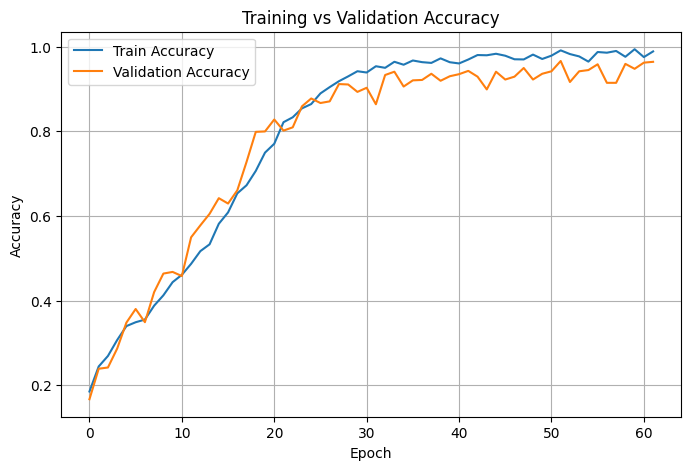

In [30]:
plt.figure(figsize=(8,5))

plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

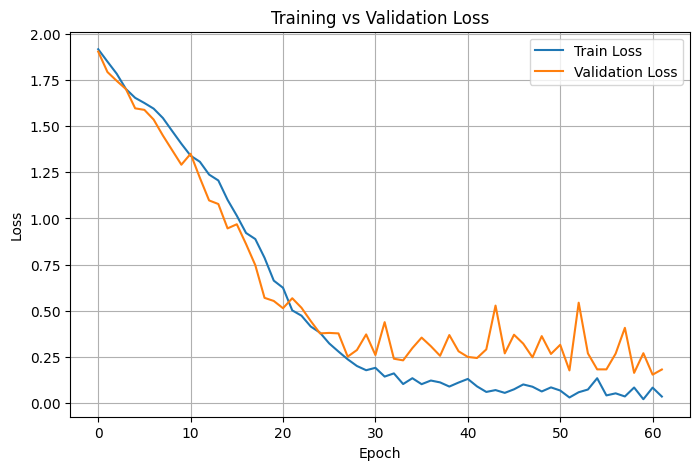

In [31]:
plt.figure(figsize=(8,5))

plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


In [32]:
import numpy as np

y_pred_probs = CNN.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


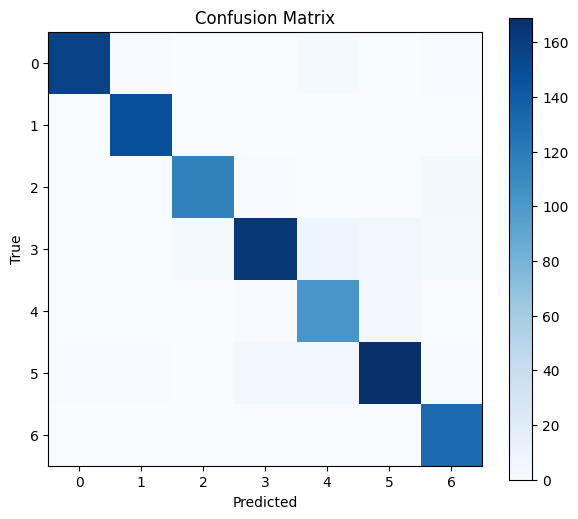

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()


In [34]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=test_generator.class_indices.keys()
))


              precision    recall  f1-score   support

         CaS       0.99      0.97      0.98       160
         CoS       0.99      1.00      0.99       149
         Gum       0.98      0.97      0.97       120
          MC       0.96      0.91      0.94       180
          OC       0.89      0.94      0.91       108
         OLP       0.94      0.94      0.94       180
          OT       0.95      1.00      0.97       131

    accuracy                           0.96      1028
   macro avg       0.96      0.96      0.96      1028
weighted avg       0.96      0.96      0.96      1028



In [28]:
CNN.save("teeth_classifier_model.h5")